<h1>Успешность и популярность компьютерных игр: определяющие факторы<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Загрузка-данных." data-toc-modified-id="Шаг-1.-Загрузка-данных.-1">Шаг 1. Загрузка данных.</a></span></li><li><span><a href="#Шаг-2.-Предообработка-данных." data-toc-modified-id="Шаг-2.-Предообработка-данных.-2">Шаг 2. Предообработка данных.</a></span></li><li><span><a href="#Шаг-3.-Исследовательский-анализ-данных." data-toc-modified-id="Шаг-3.-Исследовательский-анализ-данных.-3">Шаг 3. Исследовательский анализ данных.</a></span></li><li><span><a href="#Шаг-4.-Портрет-пользователя-каждого-региона." data-toc-modified-id="Шаг-4.-Портрет-пользователя-каждого-региона.-4">Шаг 4. Портрет пользователя каждого региона.</a></span></li><li><span><a href="#Шаг-5.-Проверка-гипотез." data-toc-modified-id="Шаг-5.-Проверка-гипотез.-5">Шаг 5. Проверка гипотез.</a></span></li><li><span><a href="#Выводы." data-toc-modified-id="Выводы.-6">Выводы.</a></span></li></ul></div>

**Исследование проведено на основе данных ,из открытых источников о дате выхода, оценках пользователей, жанре и платформе компьютерных игр. Предоставленные данные датируются вплоть до 2016 года.**

**Цель исследования: определить факторы влияющие на успешность игры, для планирования рекламной компании и закупок.**

## Шаг 1. Загрузка данных.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import statistics

In [2]:
gm = pd.read_csv('/datasets/games.csv')

In [3]:
print(gm.info())
gm.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10678,NHL 2K6,X360,2005.0,Sports,0.09,0.00,0.00,0.01,75.0,6.1,E10+
15911,Psychedelica of the Black Butterfly,PSV,2015.0,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
13802,PD Ultraman Battle Collection 64,N64,1999.0,Strategy,0.00,0.00,0.04,0.00,NaN,NaN,NaN
5007,Risk: Global Domination,PS2,2003.0,Strategy,0.19,0.15,0.00,0.05,60.0,8.8,T
9214,Super Puzzle Fighter II Turbo,PS,1996.0,Puzzle,0.08,0.05,0.00,0.01,83.0,7.4,E
3769,The LEGO Movie Videogame,XOne,2014.0,Action,0.35,0.13,0.00,0.05,69.0,6.9,E10+
2967,Shark Tale,GBA,2004.0,Action,0.49,0.18,0.00,0.01,63.0,9,E
9453,Eternal Poison (JP sales),PS2,2008.0,Role-Playing,0.00,0.00,0.13,0.00,NaN,NaN,NaN
8142,Cabela's Dangerous Hunts 2009,PS2,2008.0,Sports,0.09,0.07,0.00,0.02,NaN,9.2,T
14049,Music Maker: Rockstar,PS2,2009.0,Misc,0.02,0.01,0.00,0.00,NaN,NaN,NaN


**В данном датафрейме содержится 16715 строк и 11 колонок.Типы данных float64 и object, год релиза и рейтинг критиков необходимо привести к целочисленному типу.**

## Шаг 2. Предообработка данных.

Изменим названия колонок, приведя их к нижнему регистру, для удобства работы с данными.

In [4]:
gm.columns = gm.columns.str.lower()
gm.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Изменим тип данных в стобце user_score на float. Для этого заменим значение "tbd" (to be determined) на NaN. 
Также изменим известные значения в столбце с годом релиза на целочисленный, для улучшения восприятия.

In [5]:
gm['user_score'] = gm['user_score'].replace('tbd', np.nan)
gm['user_score'] = gm['user_score'].astype('float')

In [6]:
gm['year_of_release'] = pd.array(gm['year_of_release'], dtype = pd.Int64Dtype())

Обработаем пропуски. Для начала построим график, чтобы визуально оценить объем и распределение пропусков.

<AxesSubplot:>

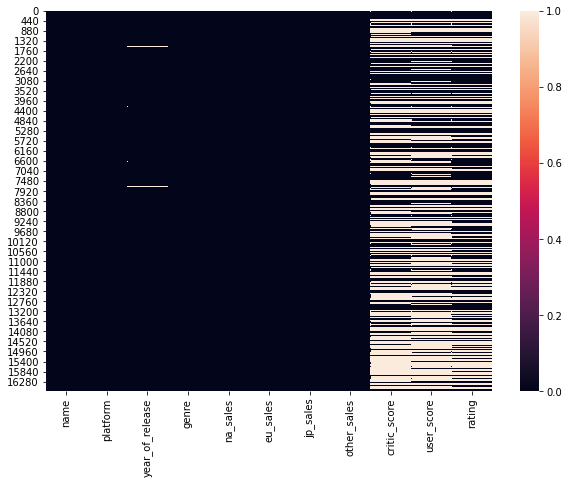

In [7]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(gm.isnull())

На графике видно, что больше всего пропусков в последних трех колонках, а именно: critic_score, user_score, rating. Оставим эти столбцы как есть.

In [8]:
print(gm.duplicated().sum())
print(gm.isnull().sum())
gm[gm['name'].isna()]

0
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
print(gm[gm.duplicated(keep=False, subset=['name','platform', 'year_of_release'])])
gm = gm.drop_duplicates(keep='first', subset=['name','platform', 'year_of_release']).reset_index(drop=True)
gm.duplicated(subset=['name','platform', 'year_of_release']).sum()

                name platform  year_of_release   genre  na_sales  eu_sales  \
604    Madden NFL 13      PS3             2012  Sports      2.11      0.22   
659              NaN      GEN             1993     NaN      1.78      0.53   
14244            NaN      GEN             1993     NaN      0.00      0.00   
16230  Madden NFL 13      PS3             2012  Sports      0.00      0.01   

       jp_sales  other_sales  critic_score  user_score rating  
604        0.00         0.23          83.0         5.5      E  
659        0.00         0.08           NaN         NaN    NaN  
14244      0.03         0.00           NaN         NaN    NaN  
16230      0.00         0.00          83.0         5.5      E  


0

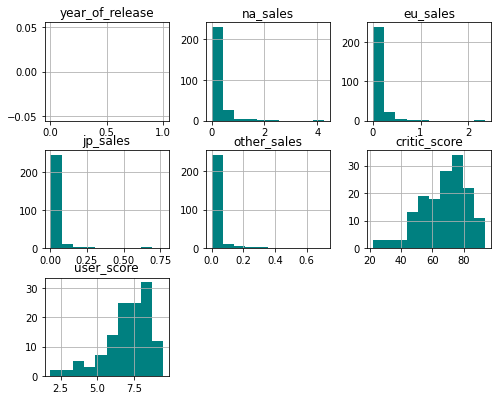

In [10]:
gm[gm['year_of_release'].isna()].hist(figsize=(8, 6.5), color = "teal")
plt.show()

Были обнаружены неявные дубликаты, оставлены записи, содержащие более полную информаци. Две записи, содержащие пропуски в колонках с названием и жанром, малоинформативны. Удалим их. Пропуски в с толбце с годом оставим, несмотря на то, что это менее 1% данных, так как там содержатся данные о весьма успешных продуктах. Пропуски в этих двух столбцах могли быть вызваны сбоем. В то время как пропуски в других столбцах (critic_score, user_score, rating), скорее всего не случайны, такой информации об этих играх может не существовать. Но для дальнейшего исследования, заменим пропуски в колонке "rating" на "undefined".

In [11]:
gm = gm.dropna(subset = ['name'])
gm['rating'] = gm['rating'].fillna('undefined')

Добавим в датафрейм столбец с суммой всех продаж.

In [12]:
gm['sales'] = gm['na_sales'] + gm['eu_sales'] + gm['jp_sales'] + gm['other_sales']
gm.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


**В ходе предобработки данных мы привели названия столбцов к нижнему регистру, изменили типы данных, изучили пропуски и добавили новый столбец с суммой всех продаж.**

## Шаг 3. Исследовательский анализ данных.

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64


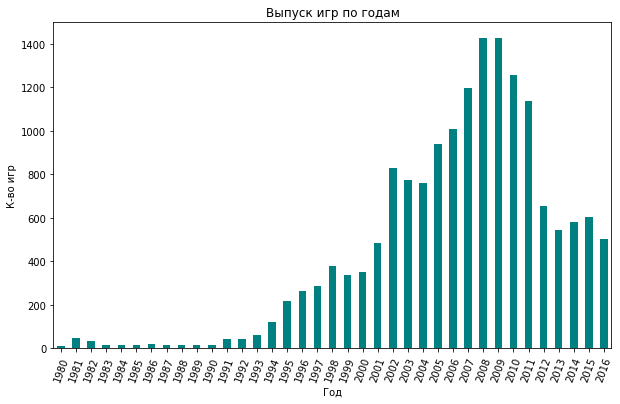

In [13]:
print(gm['year_of_release'].describe())
gmy = gm.groupby('year_of_release')['sales'].count()
gmy.plot(kind="bar", color = "teal", figsize=(10, 6))
plt.xticks(rotation=70)
plt.title('Выпуск игр по годам')
plt.xlabel('Год')
plt.ylabel('К-во игр')
plt.show()

В данных представлены игры с 1980 по 2016 год. По графику мы видим, что пик продаж игр приходится на 2008-2009 года. Также мы можем заметить, что особенно интенсивно индустрия игр стала развиваться с 1995 года, именно с этого года и можно оценивать успешность игры.

count     16712
unique       31
top         PS2
freq       2161
Name: platform, dtype: object


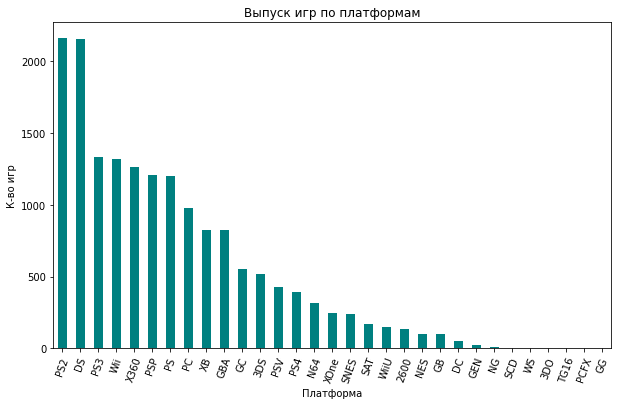

In [14]:
print(gm['platform'].describe())
gmp = gm.groupby('platform')['sales'].count().sort_values(ascending = False)
gmp.plot(kind="bar", color = "teal", figsize=(10, 6))
plt.xticks(rotation=70)
plt.title('Выпуск игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('К-во игр')
plt.show()
list_pl = gmp[:15].index

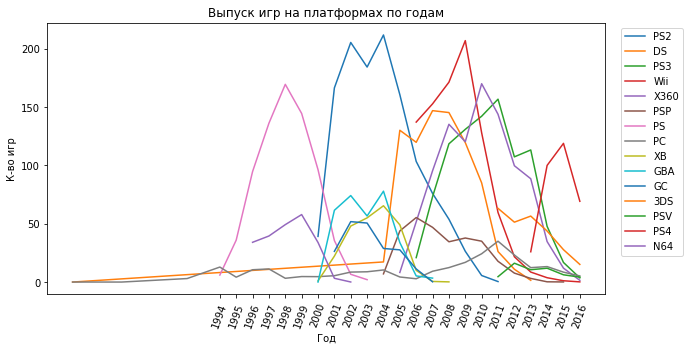

In [15]:
gmpy = gm.pivot_table(index=['platform','year_of_release'], values = ['sales'], aggfunc = 'sum')
gmpy = gmpy.reset_index('year_of_release')
fig, ax = plt.subplots(figsize =(10,5))
for platform in list_pl:
    gmpy.loc[platform].plot('year_of_release', 'sales', ax=ax)
ax.legend(list_pl, bbox_to_anchor=(1.02, 1))
ax.set_xticks(np.arange(1994,2017))
plt.xticks(rotation=70)
plt.title('Выпуск игр на платформах по годам')
plt.xlabel('Год')
plt.ylabel('К-во игр')
plt.show()

В этом графике отображены 15 с наибольшими суммарными продажами. Иходя из этой визуализации можно сделать несколько выводов:
- до 2005 года самыми популярными платформами были поочередно PS и PS2;
- мыможем заметить два периода наиболее интенсивного появления новых платформ: 2000-2001 и 2004-2006;
- всреднем наиболее продуктивным для платформы является срок 4 лет, после чего намечается спад и через 2-4 года платформа исчезает;
- с 2004 начинается наиболлее продуктивный период для индустрии игр, платформы успешно конкурируют друг с дургом, собрая большие продажи влоть до начала 2010-х;

C помощью этого графикаможно выделить период с 2010 года по настоящее время, когда намечается тенденция на спад в индустрии. Исходя из этого выделим актуальным период с 2015 года, так как именно с этого момента на рынке присутствуют все современные платформы, и наблюдается общая тендентция. К сожалению, мы не можем выделить наиболее перспективные платформы, так как продажи падают на всех платформах минимум с 2015 года. Если принимать во внимание тенденции предыдущих лет, то можно предположить, что все текущие платформы скоро исчезнут. Возможно рынок ожидает новый подъем с новыми платформами. Тем не менее,исходя из того, что на данный момент таких платформ нет, можно выделить PS4 и XOne, как наиболее продоваемые. А значит для магазина и "Стримчик", этиплатформы могут стать наиболее прибыльными.

Постром график «ящик с усами» по глобальным продажам игр в разбивке по платформам c 2014 года.

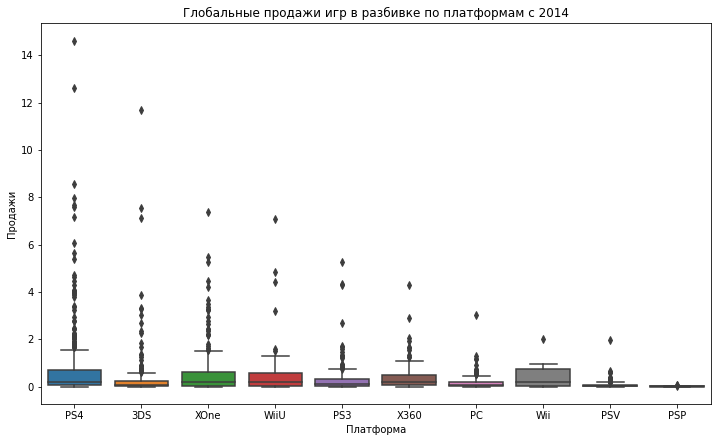

In [16]:
gma = gm[gm['year_of_release'] >= 2014]
fig, ax = plt.subplots(figsize=(12, 7))
sns.boxplot(data=gma, x='platform', y='sales')
plt.title('Глобальные продажи игр в разбивке по платформам с 2014')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

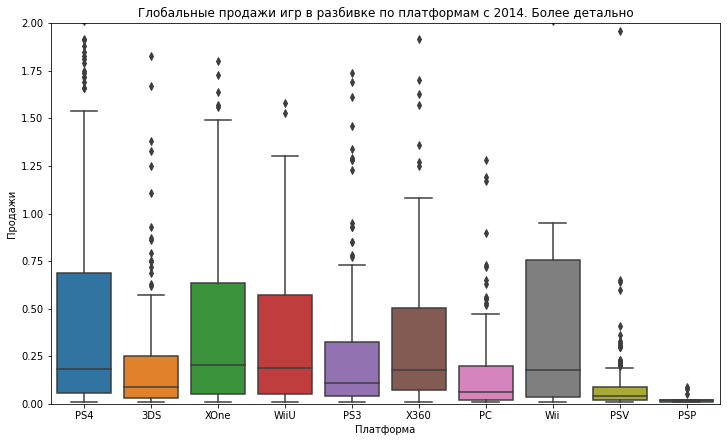

In [17]:
gma = gm[gm['year_of_release'] >= 2014]
fig, ax = plt.subplots(figsize=(12, 7))
sns.boxplot(data=gma, x='platform', y='sales')
plt.ylim(0, 2)
plt.title('Глобальные продажи игр в разбивке по платформам с 2014. Более детально')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

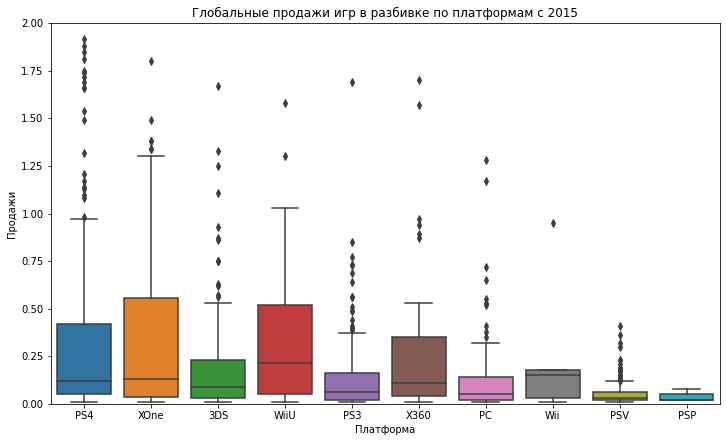

In [18]:
gma1 = gm[gm['year_of_release'] >= 2015]
fig, ax = plt.subplots(figsize=(12, 7))
sns.boxplot(data=gma1, x='platform', y='sales')
plt.ylim(0, 2)
plt.title('Глобальные продажи игр в разбивке по платформам с 2015')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

По этому графикам мы отчетливо видим, что 2014 и 2015 год сильно отличаются по лидерам продаж. Если в 2014 Wii - самая успешная платформа, то в 2015 она даже не в пятерке. Поэтому в планировании будем ориентироваться на период 2015-2016 года, где четыре лидера продаж: XOne, WiiU, PS4 и X360. Именно на них и нужно обратить внимание магазина. Причем если сравнить данные с предыдущем графиком, можно увидеть: что несмотря на то, что в этот период выпускалось больше всего игр на PS4, а XOne лидирует по продажам, хоть игр выпускает в два раза меньше. Так же хочется отметить, что PS4 имеет больше аномальных значений на графике, а значит выпускает больше хитов.

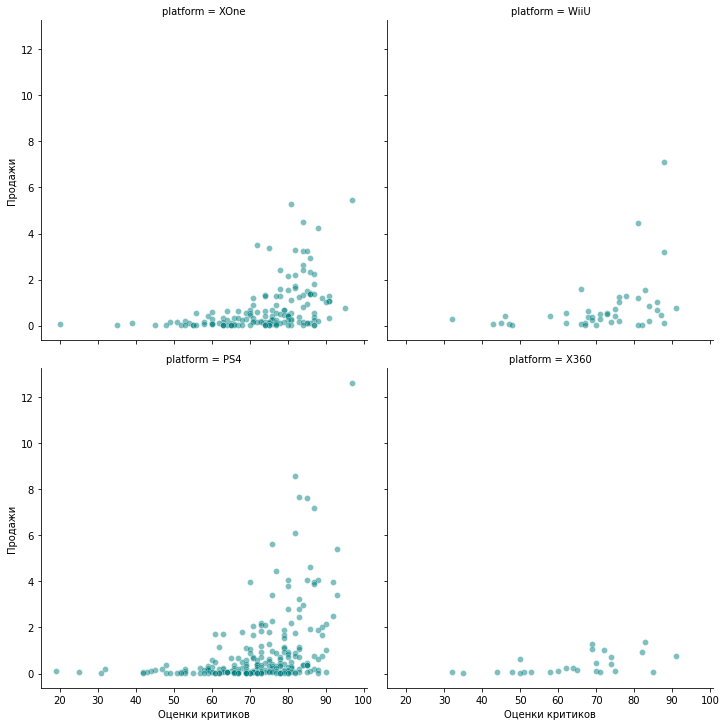

Коэффициент корреляции XOne: 0.429
Коэффициент корреляции WiiU: 0.370
Коэффициент корреляции PS4: 0.403
Коэффициент корреляции X360: 0.526


In [19]:
platforms = ['XOne', 'WiiU', 'PS4', 'X360']
g = sns.relplot(data=gma, 
            x='critic_score', 
            y='sales', 
            col='platform', 
            col_order=platforms,
            color='teal', alpha =0.5,
            col_wrap=2
           ) 
g.set_axis_labels("Оценки критиков", "Продажи")
plt.show()
for i, platform in enumerate(platforms):
    platform_data = gma[gma['platform'] == platform]
    print(f'Коэффициент корреляции {platform}: {platform_data["critic_score"].corr(platform_data["sales"]):.3f}')

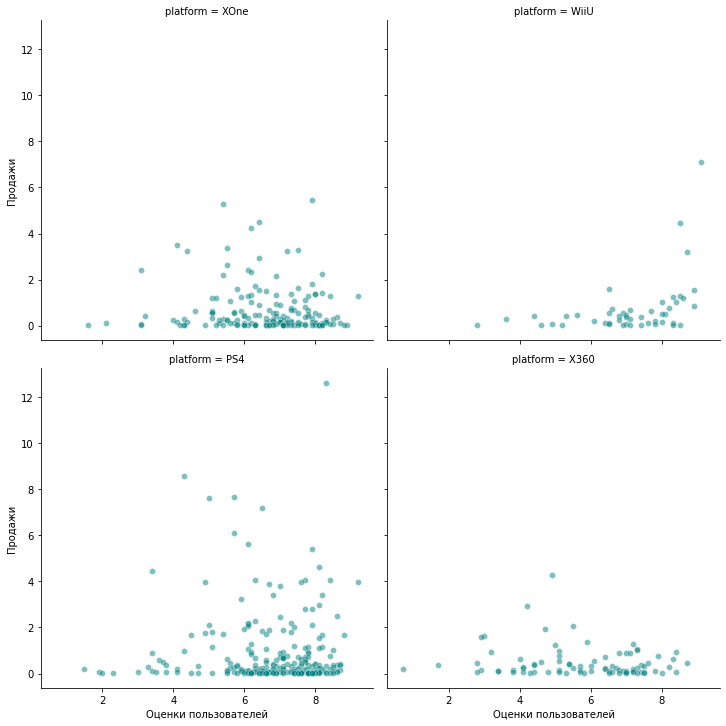

Коэффициент корреляции XOne: -0.070
Коэффициент корреляции WiiU: 0.408
Коэффициент корреляции PS4: -0.040
Коэффициент корреляции X360: -0.138


In [20]:
platforms = ['XOne', 'WiiU', 'PS4', 'X360']
g = sns.relplot(data=gma, 
            x='user_score', 
            y='sales', 
            col='platform', 
            col_order=platforms,
            color='teal', alpha =0.5,
            col_wrap=2
           ) 
g.set_axis_labels("Оценки пользователей", "Продажи")
plt.show()
for i, platform in enumerate(platforms):
    platform_data = gma[gma['platform'] == platform]
    print(f'Коэффициент корреляции {platform}: {platform_data["user_score"].corr(platform_data["sales"]):.3f}')

Взаимосвязь между продажами и оценками критиков слабая, чуть сильнее в оценках платформы X360. Корреляция между продажами и оценками пользователей крайне слабая на всех платформах, кроме WiiU, где она значительно сильней остальных, но все же остается слабой. Все это позволяет сказать, что при решении о покупке оценка игры не является ключевым фактором.

In [21]:
gmag = pd.pivot_table(data=gma, index='name', values='platform', aggfunc='count')
gmag=gmag.sort_values(by='platform', ascending=False)
gmag = gmag[:10].index
print(gmag)
#правим кавычки, чтобы опостроф не вызывал ошибки:
gmag = ['LEGO Jurassic World', 'Lego Star Wars: The Force Awakens',
       "LEGO Marvel's Avengers", 'Skylanders: SuperChargers',
       'Rugby World Cup 2015', 'Just Dance 2016', 'Just Dance 2017',
       'Adventure Time: Finn & Jake Investigations',
       'Metal Gear Solid V: The Phantom Pain', 'NBA 2K16']

Index(['Lego Batman 3: Beyond Gotham', 'LEGO The Hobbit',
       'The LEGO Movie Videogame', 'LEGO Jurassic World', 'FIFA 15',
       'The Amazing Spider-Man 2 (2014)', 'Lego Star Wars: The Force Awakens',
       'Skylanders: SuperChargers', 'LEGO Marvel's Avengers',
       'Skylanders: Trap Team'],
      dtype='object', name='name')


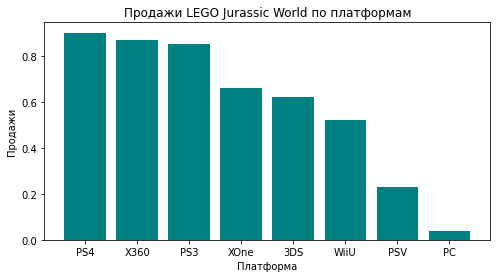

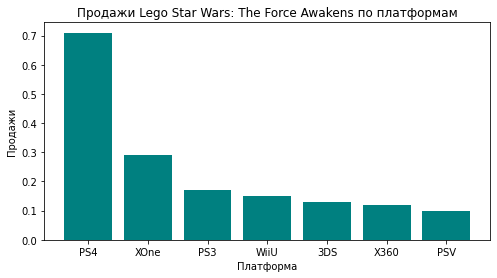

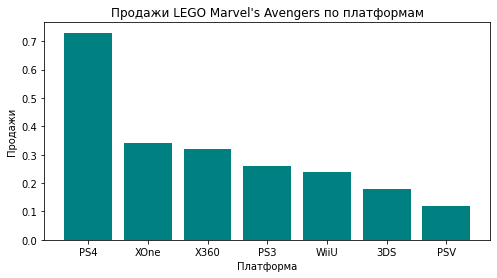

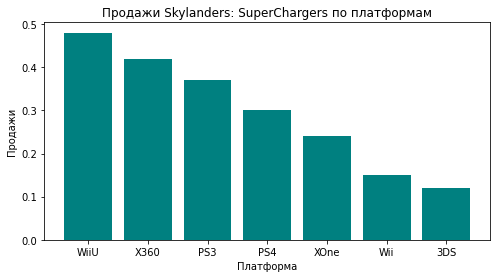

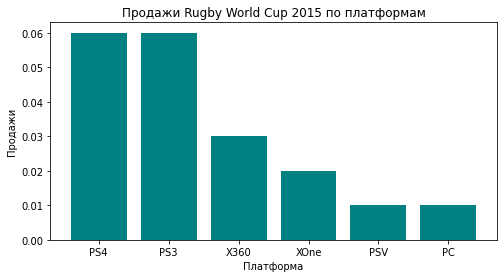

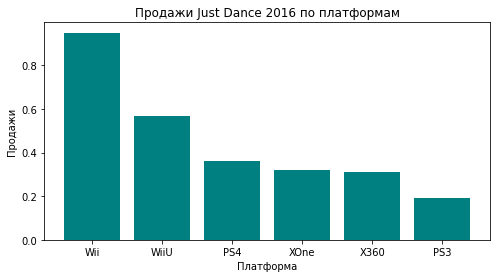

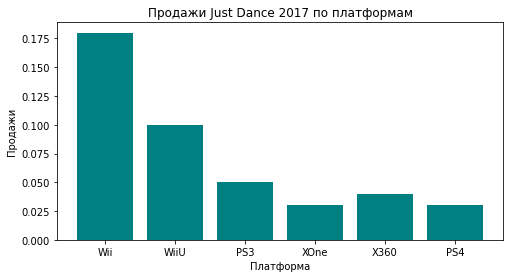

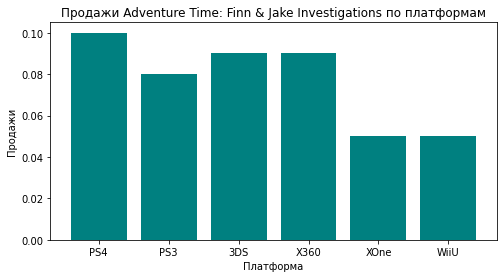

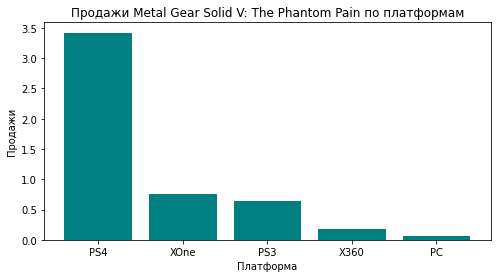

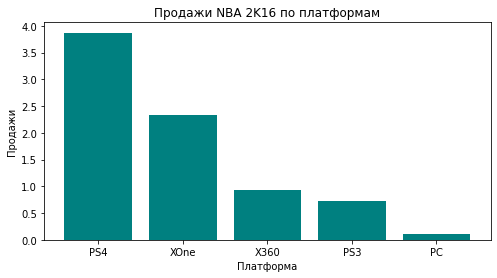

In [22]:
for game in gmag:
    game_data = gma[gma['name'] == game]
    plt.figure(figsize=(8,4))
    plt.bar(game_data['platform'],game_data['sales'], color='teal')
    plt.title(f'Продажи {game} по платформам')
    plt.xlabel('Платформа')
    plt.ylabel('Продажи')
    plt.show()

Изучив графики отображающие 10 игр, распрастраняемые сразу на нескольких платфомах, можно сделать вывод, что самые продаваемые платформы PS4, X360. XOne и WiiU. Что соответствует выводу из графика по глобальным продажам игр в разбивке по платформам. На перечисленные платформы стоит обратить внимание в первую очередь, как на самые прибыльные. Однако, некоторые игры лучше распрастраняются на других платформах, поэтому рекомендуюется поддерживать разнообразие ассортимента.

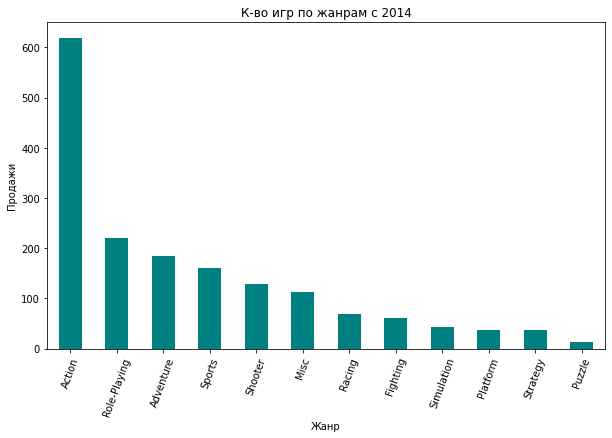

In [23]:
gma_genre = gma.groupby('genre')['sales'].count().sort_values(ascending = False)
gma_genre.plot(kind="bar", color = "teal", figsize=(10, 6))
plt.xticks(rotation=70)
plt.title('К-во игр по жанрам с 2014')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.show()

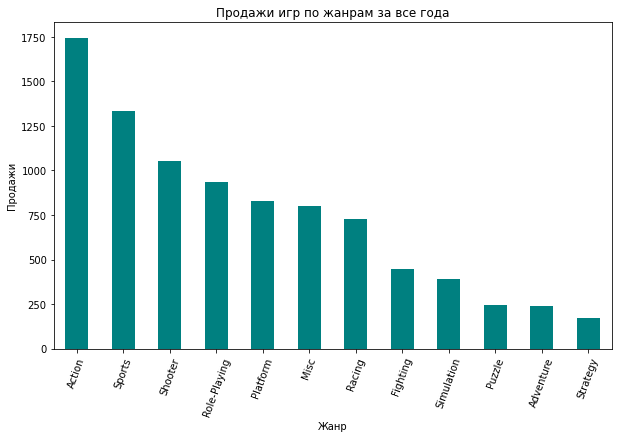

In [24]:
gm_genre = gm.groupby('genre')['sales'].sum().sort_values(ascending = False)
gm_genre.plot(kind="bar", color = "teal", figsize=(10, 6))
plt.xticks(rotation=70)
plt.title('Продажи игр по жанрам за все года')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.show()

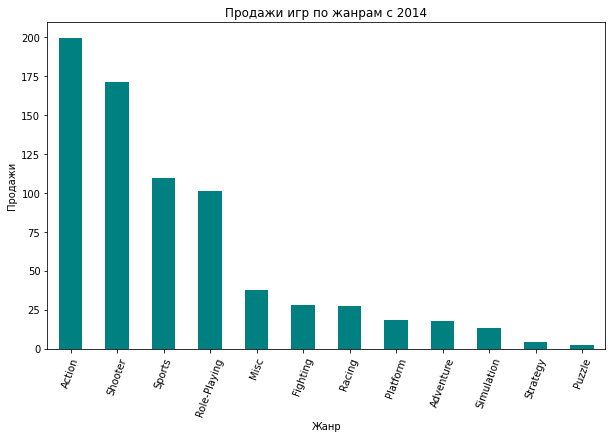

In [25]:
gma_genre = gma.groupby('genre')['sales'].sum().sort_values(ascending = False)
gma_genre.plot(kind="bar", color = "teal", figsize=(10, 6))
plt.xticks(rotation=70)
plt.title('Продажи игр по жанрам с 2014')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.show()

На первом графике мы видим, что самый расспрастраненный на рынке жанр action, количество игр этого жанра идет с большим отрывом от других. На двух других графиках видно, что в целом топ-4 популярных жанров сохраняется за все время наблюдения. Это shooter, action, sports и roll-playing. На графике актуального периода топ-4 выделяется высокими продажами, остальные жанры продаются намного хуже.

In [26]:
genre_sales = pd.pivot_table(data=gma, index='genre', values='sales', aggfunc=['mean','median'])
genre_sales

,mean,median
,sales,sales
genre,,
Action,0.322068,0.090
Adventure,0.094865,0.030
Fighting,0.470333,0.125
Misc,0.332301,0.090
Platform,0.476053,0.140
Puzzle,0.157857,0.045
Racing,0.398841,0.090
Role-Playing,0.459005,0.110


По таблице выше видно, что стабильно прибыльный жанр - это Shooter, именно шутеры имеют самые высокие значения средних и медианных продаж.

**Вывод:**  
**- Игровая индустрия развивается с 1980-х годов. Стремительное развитие начинается только с 1994, а наивысший рассвет приходятся на период с 2007 по 2011 год. С 2012 в индустрии наметился спад, который продолжается по сей день.**  
**- Игровые консоли SonyPlayStation можно считать наиболее успешными, каждая была одной из самых популярных в свое время.**  
**- Ситуация на рынке видеоигр меняется стремительно. Исходя из текущих данных, мы определили актуальный период с 2014 года. Так как именно с этого года тенденции сохраняют свой вектор.**  
**- На актуальный период самые популярные и успешные платформы: XOne, WiiU, PS4 и X360. Тем не менее стоит поддерживать разнообразие ассортимента, так как некоторые игры лучше продаются на других платформах.**  
**- На основе данных удалось выянить, что заимосвязь между продажами и оценками критиков и пользоватей слабая. Не стоит на них полагаться при планировании рекламной компании. Впрочем игнорировать также не рекомендуется.**  
**- Топ-4 популярных жанров сохраняется за все время наблюдения, это shooter, action, sports и roll-playing.**  
**- Стабильно прибыльный жанр - это Shooter, так как шутеры имеют самые высокие значения средних и медианных продаж.**

## Шаг 4. Портрет пользователя каждого региона.

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64


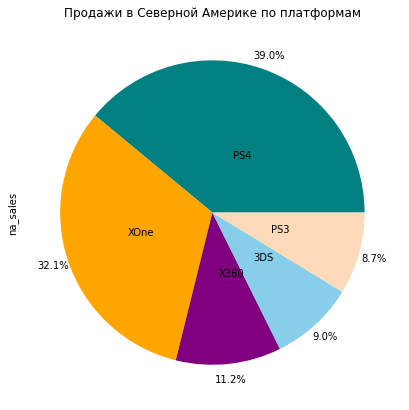

In [27]:
colors= ["teal", "orange", "purple", "skyblue", "peachpuff"]
gma_na = gma.groupby('platform')['na_sales'].agg('sum')
gma_na=gma_na.sort_values(ascending=False)[:5]
print(gma_na)
gma_na.plot(kind='pie', autopct='%1.1f%%', pctdistance=1.1, labeldistance=.4, figsize = (10, 7), colors=colors)
plt.title('Продажи в Северной Америке по платформам')
plt.show()

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64


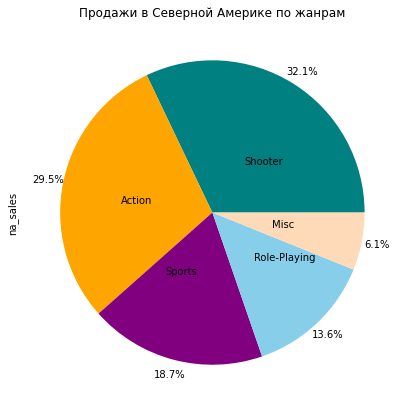

In [28]:
gmag_na = gma.groupby('genre')['na_sales'].agg('sum')
gmag_na=gmag_na.sort_values(ascending=False)[:5]
print(gmag_na)
gmag_na.plot(kind='pie', autopct='%1.1f%%', pctdistance=1.1, labeldistance=.4, figsize = (10, 7), colors=colors)
plt.title('Продажи в Северной Америке по жанрам')
plt.show()

rating
M            96.42
undefined    64.72
E            50.74
T            38.95
E10+         33.23
Name: na_sales, dtype: float64


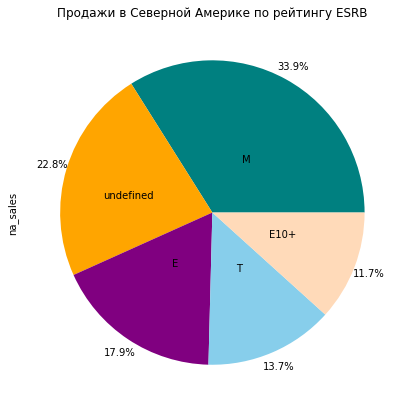

In [29]:
gmar_na = gma.groupby('rating')['na_sales'].agg('sum')
gmar_na=gmar_na.sort_values(ascending=False)[:5]
print(gmar_na)
gmar_na.plot(kind='pie', autopct='%1.1f%%', pctdistance=1.1, labeldistance=.4, figsize = (10, 7), colors=colors)
plt.title('Продажи в Северной Америке по рейтингу ESRB')
plt.show()

В Северной Америке наиболее успешные игровые платформы PS4 и XOne. Популярные жанры игр: Shooter, Action, Sports и Role-Playing. Наиболее расспрастраненный рейтинг М (для взрослых). Значительная доля продаж приходятся на игры без определенного рейтинга.

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64


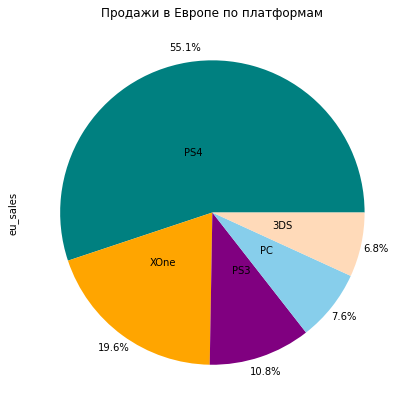

In [30]:
gma_eu = gma.groupby('platform')['eu_sales'].agg('sum')
gma_eu=gma_eu.sort_values(ascending=False)[:5]
print(gma_eu)
gma_eu.plot(kind='pie', autopct='%1.1f%%', pctdistance=1.1, labeldistance=.4, figsize = (10, 7), colors=colors)
plt.title('Продажи в Европе по платформам')
plt.show()

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64


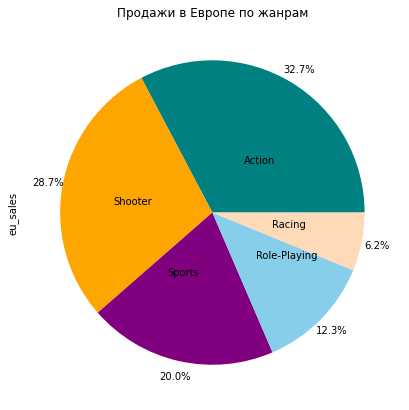

In [31]:
gmag_eu = gma.groupby('genre')['eu_sales'].agg('sum')
gmag_eu=gmag_eu.sort_values(ascending=False)[:5]
print(gmag_eu)
gmag_eu.plot(kind='pie', autopct='%1.1f%%', pctdistance=1.1, labeldistance=.4, figsize = (10, 7), colors=colors)
plt.title('Продажи в Европе по жанрам')
plt.show()

rating
M            93.44
undefined    58.95
E            58.06
T            34.07
E10+         26.16
Name: eu_sales, dtype: float64


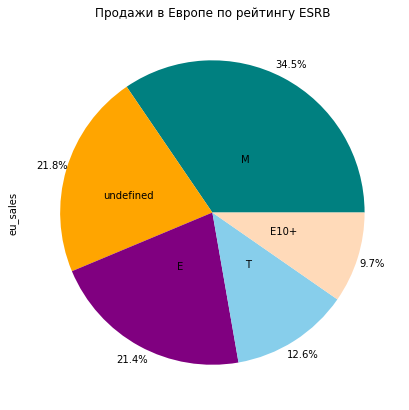

In [32]:
gmar_eu = gma.groupby('rating')['eu_sales'].agg('sum')
gmar_eu=gmar_eu.sort_values(ascending=False)[:5]
print(gmar_eu)
gmar_eu.plot(kind='pie', autopct='%1.1f%%', pctdistance=1.1, labeldistance=.4, figsize = (10, 7), colors=colors)
plt.title('Продажи в Европе по рейтингу ESRB')
plt.show()

В Европе наиболее успешной игровой платформой является PS4, игры этой плотформы занимают более половины продаж. Популярные жанры игр: Action, Shooter, Sports и Role-Playing. Наиболее расспрастраненный рейтинг М (для взрослых). Значительная доля продаж приходятся на игры без определенного рейтинга.

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64


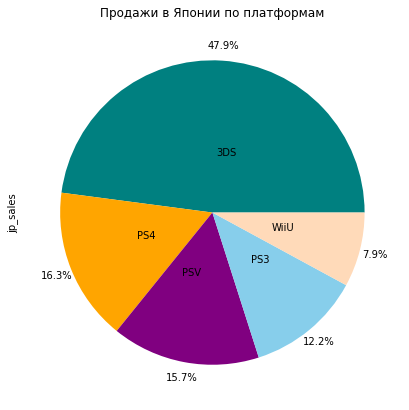

In [33]:
gma_jp = gma.groupby('platform')['jp_sales'].agg('sum')
gma_jp=gma_jp.sort_values(ascending=False)[:5]
print(gma_jp)
gma_jp.plot(kind='pie', autopct='%1.1f%%', pctdistance=1.1, labeldistance=.4, figsize = (10, 7), colors=colors)
plt.title('Продажи в Японии по платформам')
plt.show()

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64


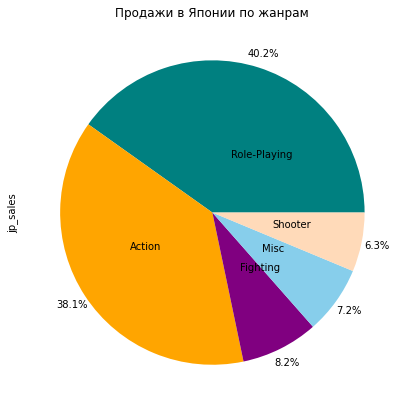

In [34]:
gmag_jp = gma.groupby('genre')['jp_sales'].agg('sum')
gmag_jp=gmag_jp.sort_values(ascending=False)[:5]
print(gmag_jp)
gmag_jp.plot(kind='pie', autopct='%1.1f%%', pctdistance=1.1, labeldistance=.4, figsize = (10, 7), colors=colors)
plt.title('Продажи в Японии по жанрам')
plt.show()

rating
undefined    56.90
T            14.78
E             8.94
M             8.01
E10+          4.46
Name: jp_sales, dtype: float64


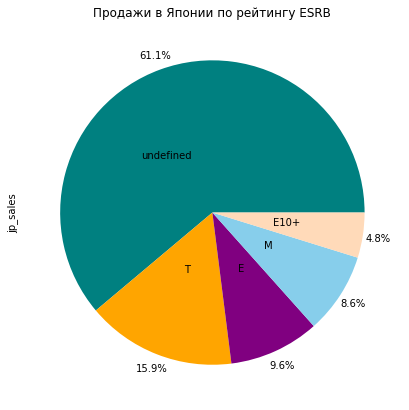

In [35]:
gmar_jp = gma.groupby('rating')['jp_sales'].agg('sum')
gmar_jp=gmar_jp.sort_values(ascending=False)[:5]
print(gmar_jp)
gmar_jp.plot(kind='pie', autopct='%1.1f%%', pctdistance=1.1, labeldistance=.4, figsize = (10, 7), colors=colors)
plt.title('Продажи в Японии по рейтингу ESRB')
plt.show()

В Японии наиболее успешной игровой платформой является 3DS, игры этой плотформы занимают почти половину продаж. Популярные жанры игр: Role-Playing и Action. В Японии больше всего игр продается без определенного рейтинга, что скорее всего связано с широким распространением локальных игра. Среди игр с определенным рейтингом - наиболее расспрастраненный рейтинг: Т (подросткам).

**Рынки видеоигр Европы и Северной Америки очень похожи по успешным платформам: PS4 и XOne; популярным жанрам: Shooter, Action, Sports и Role-Playing; и рейтингами игр, где самый распрастраненный М (для взрослых). Игровой рынок Японии сильно от них отличается. Здесь самая успешная игровая платформа: 3DS, и только потом PS4. Популярные жанры: Action и Role-Playing, а самый распрастраненный рейтинг Т (подросткам), а значит и целевая аудитория иная.**

## Шаг 5. Проверка гипотез.

Проверим пару гипотез.

**1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**  
**Нулевая гипотеза Н0:** cредние пользовательские рейтинги платформ Xbox One и PC равны.   
**Альтернативная гипотеза Н1:** средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [36]:
xone = gma[gma['platform'] == 'XOne']['user_score'].dropna()
pc = gma[gma['platform'] == 'PC']['user_score'].dropna()

alpha = 0.005
results = st.ttest_ind(xone, pc, equal_var=False)
print(f'p-value: {results.pvalue:.3f}')
if results.pvalue < alpha:
    
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
    
print()
print(f'Среднее первой выборки: {xone.mean()}')
print(f'Среднее второй выборки: {pc.mean()}')

p-value: 0.116
Нет оснований отвергнуть нулевую гипотезу

Среднее первой выборки: 6.594545454545456
Среднее второй выборки: 6.298360655737705


Результат теста не позволяет отвергнуть нулевую гипотезу, а значит cредние пользовательские рейтинги платформ Xbox One и PC как минимум очень схожи. 

**2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**  
**Нулевая гипотеза Н0:** cредние пользовательские рейтинги жанров Action и Sports равны.  
**Альтернативная гипотеза Н1:** средние пользовательские рейтинги жанров Action и Sports различаются.

In [37]:
action = gma[gma['genre'] == 'Action']['user_score'].dropna()
sports = gma[gma['genre'] == 'Sports']['user_score'].dropna()

alpha = 0.005
results = st.ttest_ind(action, sports, equal_var=False)
print(f'p-value: {results.pvalue:.30f}')
if results.pvalue < alpha:
    
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
    
print()
print(f'Среднее первой выборки: {action.mean()}')
print(f'Среднее второй выборки: {sports.mean()}')

p-value: 0.000000000000011825550382644557
Отвергаем нулевую гипотезу

Среднее первой выборки: 6.760606060606061
Среднее второй выборки: 5.2251968503937


По результатам теста мы отвергаем нулевую гипотезу в пользу альтернативной, а значит, что средние пользовательские рейтинги жанров Action и Sports различаются.

## Выводы.
В ходе исследования были изучены исторические данные о продажах игр, доступные из открытых источников вплоть до 2016 года. Для планирования закупок и рекламных компаний на 2017 год интернет магазина "Стримчик", который продает игры по всему миру.  Были сделаны следующие выводы:
- Игровая индустрия развивается с 1980-х годов. Стремительное развитие начинается только с 1994, а наивысший рассвет приходятся на период с 2007 по 2011 год. С 2012 в индустрии наметился спад, который продолжается по сей день.
- Игровые консоли SonyPlayStation можно считать наиболее успешными, каждая была одной из самых популярных в свое время.
- Ситуация на рынке видеоигр меняется стремительно. Исходя из текущих данных, мы определили актуальный период с 2014 года. Так как именно с этого года тенденции сохраняют свой вектор.
- На актуальный период самые популярные и успешные платформы: XOne, WiiU, PS4 и X360. Тем не менее стоит поддерживать разнообразие ассортимента, так как некоторые игры лучше продаются на других платформах.
- На основе данных удалось выянить, что заимосвязь между продажами и оценками критиков и пользоватей слабая. Не стоит на них полагаться при планировании рекламной компании. Впрочем игнорировать также не рекомендуется.
- Топ-4 популярных жанров сохраняется за все время наблюдения, это shooter, action, sports и roll-playing.  
- Стабильно прибыльный жанр - это Shooter, так как шутеры имеют самые высокие значения средних и медианных продаж.
- Рынки видеоигр Европы и Северной Америки очень похожи по успешным платформам: PS4 и XOne; популярным жанрам: Shooter, Action, Sports и Role-Playing; и рейтингами игр, где самый распрастраненный М (для взрослых). Игровой рынок Японии сильно от них отличается. Здесь самая популярная игровая платформа 3DS и PS4.  
- Средние пользовательские рейтинги платформ Xbox One и PC имеют похожие значения. 
- Средние пользовательские рейтинги жанров Action и Sports имеют значительные различия.